# Read data and reformat 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

from scipy.signal import find_peaks
from scipy.fftpack import fft,ifft

In [2]:
from brainflow.board_shim import BoardShim, BrainFlowInputParams, LogLevels, BoardIds
from brainflow.data_filter import DataFilter, FilterTypes, AggOperations, WindowFunctions, NoiseTypes, DetrendOperations
from brainflow.ml_model import MLModel, BrainFlowMetrics, BrainFlowClassifiers, BrainFlowModelParams

import mne
from mne.channels import read_layout

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Alphabet

In [4]:
data_alphabet_1 = './data/Tests_EEG_Lintao/alphabets_test_1.txt'
data_alphabet_2 = './data/Tests_EEG_Lintao/alphabets_test_2.txt'
data_alphabet_3 = './data/Tests_EEG_Lintao/alphabets_test_3.txt'
data_alphabet_4 = './data/Tests_EEG_Lintao/alphabets_test_4.txt'
data_alphabet_5 = './data/Tests_EEG_Lintao/alphabets_test_5.txt'
data_alphabet_6 = './data/Tests_EEG_Lintao/alphabets_test_6.txt'
data_alphabet_X = './data/Tests_EEG_Lintao/alphabets_test_X.txt'

data_asl_1 = './data/Tests_EEG_Lintao/asl_test_1.txt'
data_asl_2 = './data/Tests_EEG_Lintao/asl_test_2.txt'
data_asl_3 = './data/Tests_EEG_Lintao/asl_test_3.txt'
data_asl_4 = './data/Tests_EEG_Lintao/asl_test_4.txt'
data_asl_5 = './data/Tests_EEG_Lintao/asl_test_5.txt'
data_asl_6 = './data/Tests_EEG_Lintao/asl_test_6.txt'
data_asl_X = './data/Tests_EEG_Lintao/asl_test_X.txt'

label_alphabet_1 = './data/Tests_EEG_Lintao/labels_alphabets_1.txt'
label_alphabet_2 = './data/Tests_EEG_Lintao/labels_alphabets_2.txt'
label_alphabet_3 = './data/Tests_EEG_Lintao/labels_alphabets_3.txt'
label_alphabet_4 = './data/Tests_EEG_Lintao/labels_alphabets_4.txt'
label_alphabet_5 = './data/Tests_EEG_Lintao/labels_alphabets_5.txt'
label_alphabet_6 = './data/Tests_EEG_Lintao/labels_alphabets_6.txt'
label_alphabet_X = './data/Tests_EEG_Lintao/labels_alphabets_X.txt'

In [5]:
names=['Index','ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13',
       'ch14', 'ch15', 'ch16', 'accel_x', 'accel_y', 'accel_z', 'other1', 'other2', 'other3', 'other4', 'other5',
       'other6', 'other7', 'analog_ch1', 'analog_ch2','analog_ch3', 'TimeStamp', 'other8', 'time']

usecols=['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8','ch9', 'ch10',
         'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16', 'TimeStamp', 'time']


alphabet1= pd.read_csv(data_alphabet_1, sep=",", header=6, index_col=False, names=names)
alphabet2= pd.read_csv(data_alphabet_2, sep=",", header=6, index_col=False, names=names)
alphabet3= pd.read_csv(data_alphabet_3, sep=",", header=6, index_col=False, names=names)
alphabet4= pd.read_csv(data_alphabet_4, sep=",", header=6, index_col=False, names=names)
alphabet5= pd.read_csv(data_alphabet_5, sep=",", header=6, index_col=False, names=names)
alphabet6= pd.read_csv(data_alphabet_6, sep=",", header=6, index_col=False, names=names)
alphabetX= pd.read_csv(data_alphabet_X, sep=",", header=6, index_col=False, names=names)

asl1= pd.read_csv(data_asl_1, sep=",", header=6, index_col=False, names=names)
asl2= pd.read_csv(data_asl_2, sep=",", header=6, index_col=False, names=names)
asl3= pd.read_csv(data_asl_3, sep=",", header=6, index_col=False, names=names)
asl4= pd.read_csv(data_asl_4, sep=",", header=6, index_col=False, names=names)
asl5= pd.read_csv(data_asl_5, sep=",", header=6, index_col=False, names=names)
asl6= pd.read_csv(data_asl_6, sep=",", header=6, index_col=False, names=names)
aslX= pd.read_csv(data_asl_X, sep=",", header=6, index_col=False, names=names)

labels_1 = pd.read_csv(label_alphabet_1, sep=',', index_col=False, names=['label_index', 'label', 'filename'])
labels_2 = pd.read_csv(label_alphabet_2, sep=',', index_col=False, names=['label_index', 'label', 'filename'])
labels_3 = pd.read_csv(label_alphabet_3, sep=',', index_col=False, names=['label_index', 'label', 'filename'])
labels_4 = pd.read_csv(label_alphabet_4, sep=',', index_col=False, names=['label_index', 'label', 'filename'])
labels_5 = pd.read_csv(label_alphabet_5, sep=',', index_col=False, names=['label_index', 'label', 'filename'])
labels_6 = pd.read_csv(label_alphabet_6, sep=',', index_col=False, names=['label_index', 'label', 'filename'])
labels_X = pd.read_csv(label_alphabet_X, sep=',', index_col=False, names=['label_index', 'label', 'filename'])


In [6]:
alphabet3.head()

,Index,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,...,other4,other5,other6,other7,analog_ch1,analog_ch2,analog_ch3,TimeStamp,other8,time
0,4.0,-4971.586760,-3163.420041,-650.949854,-5234.309165,2679.638884,2884.582029,-3164.716442,572.539934,-1166.001101,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.649236e+09,0.0,2022-04-06 11:12:57.737
1,6.0,-4947.603339,-3138.140218,-629.626290,-5214.214947,2691.597067,2894.014465,-3149.092573,586.219202,-1157.350976,...,123.5,56.0,14.0,112.0,0.0,0.0,0.0,1.649236e+09,0.0,2022-04-06 11:12:57.737
2,8.0,-4960.589702,-3152.422983,-645.808953,-5231.783418,2681.829355,2885.856078,-3164.470573,571.422347,-1161.016662,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.649236e+09,0.0,2022-04-06 11:12:57.737
3,10.0,-4952.721888,-3143.281119,-639.125781,-5222.328630,2689.093672,2884.582029,-3152.892369,582.352350,-1149.058479,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.649236e+09,0.0,2022-04-06 11:12:57.737
4,12.0,-4955.672318,-3145.538645,-641.696232,-5219.959345,2687.238477,2882.928000,-3152.981776,583.179365,-1163.005967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.649236e+09,0.0,2022-04-06 11:12:57.737


In [7]:
# choose the columns useful
alphabet1_selected = alphabet1[usecols]
alphabet2_selected = alphabet2[usecols]
alphabet3_selected = alphabet3[usecols]
alphabet4_selected = alphabet4[usecols]
alphabet5_selected = alphabet5[usecols]
alphabet6_selected = alphabet6[usecols]
alphabetX_selected = alphabetX[usecols]

asl1_selected = asl1[usecols]
asl2_selected = asl2[usecols]
asl3_selected = asl3[usecols]
asl4_selected = asl4[usecols]
asl5_selected = asl5[usecols]
asl6_selected = asl6[usecols]
aslX_selected = aslX[usecols]

In [8]:
alphabet1_selected.head()

,ch1,ch2,ch3,ch4,ch5,ch6,ch7,ch8,ch9,ch10,ch11,ch12,ch13,ch14,ch15,ch16,TimeStamp,time
0,-3123.030439,-6392.017769,2877.273008,-47.408050,-2224.780884,-4309.349276,-4564.874418,-4443.727963,7127.233699,-204.004372,3899.462986,11013.375045,-3488.302647,-2578.184316,-2840.794962,1294.568335,1.649772e+09,2022-04-12 15:54:04.712
1,-3123.231604,-6384.865211,2876.557753,-48.346823,-2218.455341,-4305.840052,-4561.208732,-4439.458780,7132.039324,-195.041322,3896.020817,11008.569420,-3486.782728,-2566.874333,-2838.805656,1300.536251,1.649772e+09,2022-04-12 15:54:04.712
2,-3119.498863,-6387.145089,2879.284665,-44.882303,-2226.367858,-4308.566965,-4570.864686,-4446.611338,7127.032534,-192.135595,3896.847832,11012.525679,-3487.520336,-2569.243618,-2840.258520,1298.278725,1.649772e+09,2022-04-12 15:54:04.712
3,-3120.236471,-6383.926437,2877.809450,-49.106783,-2218.991783,-4308.634020,-4558.459468,-4440.598719,7128.395990,-198.528194,3898.591268,11013.509156,-3488.079129,-2574.228057,-2840.839665,1296.892917,1.649772e+09,2022-04-12 15:54:04.712
4,-3120.057657,-6390.229629,2878.524706,-48.972672,-2221.986916,-4311.539747,-4563.868590,-4444.733792,7131.458179,-198.841119,3896.244335,11005.104900,-3484.838126,-2567.030795,-2837.866883,1299.955106,1.649772e+09,2022-04-12 15:54:04.712


In [9]:
alphabet1_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97815 entries, 0 to 97814
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ch1        97815 non-null  float64
 1   ch2        97815 non-null  float64
 2   ch3        97815 non-null  float64
 3   ch4        97815 non-null  float64
 4   ch5        97815 non-null  float64
 5   ch6        97815 non-null  float64
 6   ch7        97815 non-null  float64
 7   ch8        97815 non-null  float64
 8   ch9        97815 non-null  float64
 9   ch10       97815 non-null  float64
 10  ch11       97815 non-null  float64
 11  ch12       97815 non-null  float64
 12  ch13       97815 non-null  float64
 13  ch14       97815 non-null  float64
 14  ch15       97815 non-null  float64
 15  ch16       97815 non-null  float64
 16  TimeStamp  97815 non-null  float64
 17  time       97815 non-null  object 
dtypes: float64(17), object(1)
memory usage: 13.4+ MB


In [10]:
sampling_rate =  125

In [11]:
# from time to timestamp
# print(alphabet3_selected['time'][9800])
timeArray = time.strptime(str(alphabet3_selected['time'][9800]), " %Y-%m-%d %H:%M:%S.%f") 
timestamp = time.mktime(timeArray)
timestamp

1649236455.0

In [12]:
Timestamps1 = np.array(alphabet1_selected['TimeStamp'] - alphabet1_selected['TimeStamp'][0])
# print("Timestamps shape: ", Timestamps.shape)
print("Total length of data: ", Timestamps1[-1], 's')

Total length of data:  781.2487998008728 s


Plot one file asl/alphabet

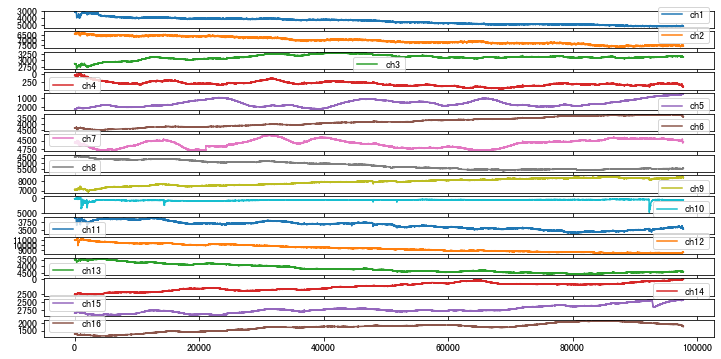

In [13]:
EEG_data = alphabet1_selected[['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', \
                               'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16']]
df = pd.DataFrame(EEG_data)
df[['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 
                               'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16']].plot(subplots=True, figsize=(12, 6))
plt.show()

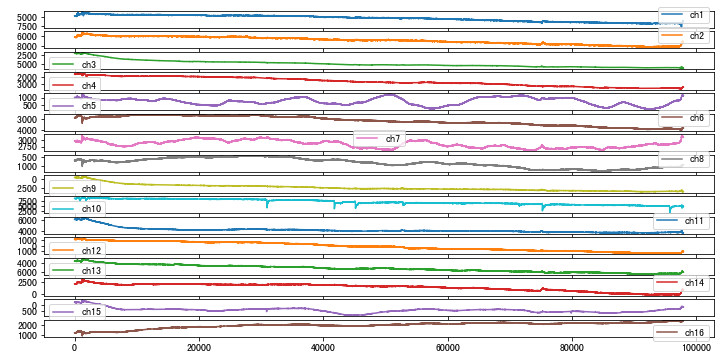

In [73]:
EEG_data = asl1_selected[['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', \
                               'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16']]
df = pd.DataFrame(EEG_data)
df[['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 
                               'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16']].plot(subplots=True, figsize=(12, 6))
plt.show()

EEG data shape:  (97815, 16)


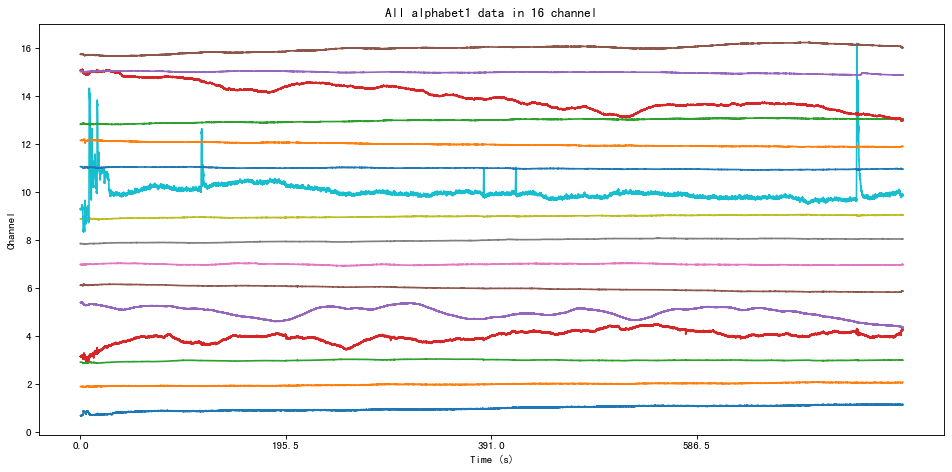

In [14]:
EEG_data = alphabet1_selected[['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 
                               'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16']].to_numpy()
print("EEG data shape: ", EEG_data.shape)

plt.figure(figsize=(12, 6), dpi=80)
for i in range(EEG_data.shape[1]):
    plt.plot(EEG_data[:,i]/np.mean(EEG_data[:,i])+i)
plt.xticks(ticks=np.arange(0, round(Timestamps1[-1]+1)*sampling_rate, round(Timestamps1[-1]+1)*sampling_rate/4), 
           labels=np.arange(0, round(Timestamps1[-1]+1),round(Timestamps1[-1]+1)/4))
# plt.yticks(ticks=np.arange(0,8))
plt.xlabel('Time (s)')
plt.ylabel('Channel')
plt.title("All alphabet1 data in 16 channel")
plt.tight_layout()
plt.show()

EEG data shape:  (97937, 16)


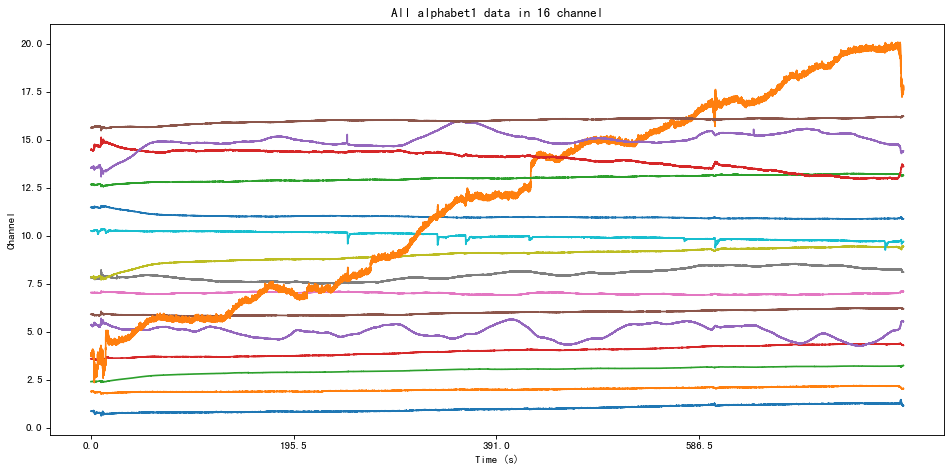

In [72]:
EEG_data = asl1_selected[['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 
                               'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16']].to_numpy()
print("EEG data shape: ", EEG_data.shape)

plt.figure(figsize=(12, 6), dpi=80)
for i in range(EEG_data.shape[1]):
    plt.plot(EEG_data[:,i]/np.mean(EEG_data[:,i])+i)
plt.xticks(ticks=np.arange(0, round(Timestamps1[-1]+1)*sampling_rate, round(Timestamps1[-1]+1)*sampling_rate/4), 
           labels=np.arange(0, round(Timestamps1[-1]+1),round(Timestamps1[-1]+1)/4))
# plt.yticks(ticks=np.arange(0,8))
plt.xlabel('Time (s)')
plt.ylabel('Channel')
plt.title("All alphabet1 data in 16 channel")
plt.tight_layout()
plt.show()

# Split our data


In [15]:
Timestamps1[-1]

781.2487998008728

In [16]:
Timestamps1[0]

0.0

In [17]:
len(Timestamps1)

97815

In [18]:
# find the starting index of our range
for i in range(len(Timestamps1)):
    if Timestamps1[i] - Timestamps1[0] >= 18:
        print(i)
        print(Timestamps1[i] - Timestamps1[0]-18)
        break

2283
0.2593257427215576


In [19]:
# find the ending index of our range
for i in range(len(Timestamps1)):
    if Timestamps1[i] - Timestamps1[0] >= 774.4:
        print(i)
        print(Timestamps1[i] - Timestamps1[0]-774.4)
        break

96913
0.12196526527407059


In [20]:
Timestamps2 = np.array(alphabet2_selected['TimeStamp'] - alphabet2_selected['TimeStamp'][0])
# find the starting index of our range
for i in range(len(Timestamps2)):
    if Timestamps2[i] - Timestamps2[0] >= 18:
        print(i)
        print(Timestamps2[i] - Timestamps2[0]-18)
        break

# find the ending index of our range
for i in range(len(Timestamps2)):
    if Timestamps2[i] - Timestamps2[0] >= 774.4:
        print(i)
        print(Timestamps2[i] - Timestamps2[0]-774.4)
        break

2283
0.2578282356262207
96890
0.0013135433197248858


we can find the index is different, so that means each files are needed to do this(by a function)

In [21]:
TimestampsX = np.array(alphabetX_selected['TimeStamp'] - alphabetX_selected['TimeStamp'][0])
# print("Total length of data for X: ", TimestampsX[-1], 's')

# find the ending index of our range for X
for i in range(len(TimestampsX)):
    if TimestampsX[i] - TimestampsX[0] >= 554.8:
        print(i)
        print(TimestampsX[i] - TimestampsX[0]-554.8)
        break

69438
0.1643580913544156


For alphabet1

In [22]:
Timestamps1[2283]

18.259325742721558

In [23]:
Timestamps1[2282]

17.779026746749878

In [24]:
Timestamps1[96912]

774.0408504009247

In [25]:
# 124*6.1= 756.4
Timestamps1[96912]-Timestamps1[2283]

755.7815246582031

In [26]:
indexs = list()
current = Timestamps1[2283]
current_index = 2283
vision = True
current_missing = Timestamps1[2283]-18
count_vision = 0 
count_imagination = 0 
for i in range(2283, 96913):

    if vision:
        if Timestamps1[i] - current >= 3.1-current_missing:
            # print(Timestamps1[i] - current -3.1)
            # print(Timestamps1[i] - Timestamps1[i-1])
            count_vision += 1
            current_missing = Timestamps1[i] - 18 - 3.1*count_vision - 3.0*count_imagination
            vision = False
            current = Timestamps1[i]
            # use i-1 not i
            indexs.append((current_index, i-1))
            current_index = i

    else:
        if Timestamps1[i] - current >= 3.0-current_missing:
            # print(Timestamps1[i] - current -3.0)
            # print(Timestamps1[i] - Timestamps1[i-1])
            count_imagination += 1
            current_missing = Timestamps1[i] - 18 - 3.1*count_vision - 3.0*count_imagination
            vision = True
            current = Timestamps1[i]
            indexs.append((current_index, i-1))
            current_index = i

indexs.append((current_index, 96912))

In [27]:
# the length should be 124*2= 248
len(indexs)

248

In [28]:
indexs[0]

(2283, 2642)

In [29]:
indexs[1]

(2643, 3063)

In [30]:
indexs[-1]

(96553, 96912)

In [31]:
def get_intervals_data(df, named_X=False): 
    # get timestamp array
    Timestamps = np.array(df['TimeStamp'] - df['TimeStamp'][0])
    
    # find the starting index of our range
    for i in range(len(Timestamps)):
        if Timestamps[i] - Timestamps[0] >= 18:
            starting = i
            break
            
    if named_X:
        # find the ending index of our range for X
        for i in range(len(Timestamps)):
            if Timestamps[i] - Timestamps[0] >= 554.8:
                ending = i-1
                break
    else:
        # find the ending index of our range for number
        for i in range(len(Timestamps)):
            if Timestamps[i] - Timestamps[0] >= 774.4:
                ending = i-1
                break
                
    # get the intervals
    indexs = list()
    length_vision = list()
    length_imagination = list()
    current = Timestamps[starting]
    current_index = starting
    vision = True
    current_missing = Timestamps[starting]-18
    count_vision = 0 
    count_imagination = 0 
    
    for i in range(starting, ending+1): 

        if vision:
            if Timestamps[i] - current >= 3.1-current_missing:

                count_vision += 1
                current_missing = Timestamps[i] - 18 - 3.1*count_vision - 3.0*count_imagination
                vision = False
                current = Timestamps[i]
                # use i-1 not i, make sure data interval is pure data
                indexs.append((current_index, i-1))
                length_vision.append(i-1-current_index)
                current_index = i

        else:
            if Timestamps[i] - current >= 3.0-current_missing:

                count_imagination += 1
                current_missing = Timestamps[i] - 18 - 3.1*count_vision - 3.0*count_imagination
                vision = True
                current = Timestamps[i]
                indexs.append((current_index, i-1))
                length_imagination.append(i-1-current_index)
                current_index = i

    indexs.append((current_index, ending))
    
    if named_X:
        assert len(indexs) == 88*2
    else:
        assert len(indexs) == 124*2
    
    return indexs, length_vision, length_imagination

In [32]:
indexs_1, length_vision1, length_imagination1 = get_intervals_data(alphabet1_selected)

In [33]:
indexs == indexs_1

True

So we can obtain the data piece that we need

In [37]:
indexs_alphabet1, length_vision1, length_imagination1 = get_intervals_data(alphabet1_selected)
indexs_alphabet2, length_vision2, length_imagination2 = get_intervals_data(alphabet2_selected)
indexs_alphabet3, length_vision3, length_imagination3 = get_intervals_data(alphabet3_selected)
indexs_alphabet4, length_vision4, length_imagination4 = get_intervals_data(alphabet4_selected)
indexs_alphabet5, length_vision5, length_imagination5 = get_intervals_data(alphabet5_selected)
indexs_alphabet6, length_vision6, length_imagination6 = get_intervals_data(alphabet6_selected)
indexs_alphabetX, length_visionX, length_imaginationX = get_intervals_data(alphabetX_selected, named_X=True)

indexs_asl1, length_vision11, length_imagination11 = get_intervals_data(asl1_selected)
indexs_asl2, length_vision22, length_imagination22 = get_intervals_data(asl2_selected)
indexs_asl3, length_vision33, length_imagination33 = get_intervals_data(asl3_selected)
indexs_asl4, length_vision44, length_imagination44 = get_intervals_data(asl4_selected)
indexs_asl5, length_vision55, length_imagination55 = get_intervals_data(asl5_selected)
indexs_asl6, length_vision66, length_imagination66 = get_intervals_data(asl6_selected)
indexs_aslX, length_visionXX, length_imaginationXX = get_intervals_data(aslX_selected, named_X=True)


Analyse the lengths of the data intervals, if need, we can cut the data interval in a same length(min lengths)

In [38]:
print(min(length_vision1), min(length_vision2), min(length_vision3), min(length_vision4),
      min(length_vision5),min(length_vision6), min(length_visionX))

359 358 359 359 359 359 359


In [39]:
print(min(length_vision11), min(length_vision22), min(length_vision33), min(length_vision44),
      min(length_vision55), min(length_vision66), min(length_visionXX))

359 359 359 359 359 359 359


In [40]:
print(min(length_imagination1), min(length_imagination2), min(length_imagination3), 
      min(length_imagination4), min(length_imagination5), min(length_imagination6), min(length_imaginationX))

359 358 347 346 359 359 359


In [41]:
print(min(length_imagination11), min(length_imagination22), min(length_imagination33), min(length_imagination44),
      min(length_imagination55), min(length_imagination66), min(length_imaginationXX))

359 359 359 359 359 359 359


The most often min length is 359, but still some 347 346

In [42]:
from collections import Counter

In [43]:
Counter(length_vision1)

Counter({359: 19, 360: 49, 419: 11, 420: 45})

In [44]:
Counter(length_imagination4)

Counter({359: 26, 360: 65, 419: 5, 420: 24, 392: 1, 346: 1, 403: 1})

So if we need to keep same length, this length will be 346,

and if we want to use the longest length for LSTM/RNN we will also need to keep a padding matrix 

# Pack data and package all this process

For now, we get our intervals, we need to pack this data with data source, vision/imagination, label, label_index as a new dataframe or a dict

In [62]:
alphabet_vision = list()
alphabet_imagination = list()
asl_vision = list()
asl_imagination = list()

In [63]:
labels_1

,label_index,label,filename
0,9,I,I_2.png
1,6,F,F_5.png
2,17,Q,Q_2.png
3,4,D,D_2.png
4,22,V,V_1.png
...,...,...,...
120,18,R,R_5.png
121,16,P,P_2.png
122,15,O,O_3.png
123,7,G,G_5.png


alphabet vision

In [64]:
data_intervals = [indexs_alphabet1, indexs_alphabet2, indexs_alphabet3, indexs_alphabet4,
                  indexs_alphabet5,indexs_alphabet6, indexs_alphabetX]
labels_source = [labels_1, labels_2, labels_3, labels_4, labels_5, labels_6, labels_X]
data_source = [alphabet1_selected, alphabet2_selected, alphabet3_selected, alphabet4_selected,
                alphabet5_selected, alphabet6_selected, alphabetX_selected]
data_source_index = [0,1,2,3,4,5,6]


for i in range(0,7):
    label_index = labels_source[i]["label_index"].tolist()
    label_name = labels_source[i]["label"].tolist() 
    
    for j in range(0, len(data_intervals[i]), 2):
        # print(label_index[j/2])
        current_data = (data_source_index[i],data_intervals[i][j],"vision","alphabet", label_index[int(j/2)], label_name[int(j/2)])
        alphabet_vision.append(current_data)

In [65]:
# 124*6 + 88
len(alphabet_vision)

832

alphabet imagination 

In [66]:
data_intervals = [indexs_alphabet1, indexs_alphabet2, indexs_alphabet3, indexs_alphabet4,
                  indexs_alphabet5,indexs_alphabet6, indexs_alphabetX]
labels_source = [labels_1, labels_2, labels_3, labels_4, labels_5, labels_6, labels_X]
data_source = [alphabet1_selected, alphabet2_selected, alphabet3_selected, alphabet4_selected,
                alphabet5_selected, alphabet6_selected, alphabetX_selected]
data_source_index = [0,1,2,3,4,5,6]

for i in range(0,7):
    label_index = labels_source[i]["label_index"].tolist()
    label_name = labels_source[i]["label"].tolist() 
    
    for j in range(1, len(data_intervals[i])+1, 2):
        # print(label_index[j/2])
        current_data = (data_source_index[i],data_intervals[i][j],"imagination", "alphabet", label_index[int(j/2)], label_name[int(j/2)])
        alphabet_imagination.append(current_data)

In [67]:
len(alphabet_imagination)

832

asl vision

In [68]:
data_intervals = [indexs_asl1, indexs_asl2, indexs_asl3, indexs_asl4, indexs_asl5, indexs_asl6, indexs_aslX]
labels_source = [labels_1, labels_2, labels_3, labels_4, labels_5, labels_6, labels_X]
data_source = ["alphabet1_selected", "alphabet2_selected", "alphabet3_selected", "alphabet4_selected",
                "alphabet5_selected", "alphabet6_selected", "alphabetX_selected"]

for i in range(0,7):
    label_index = labels_source[i]["label_index"].tolist() 
    label_name = labels_source[i]["label"].tolist() 
    
    for j in range(0, len(data_intervals[i]), 2):
        # print(label_index[j/2])
        current_data = (data_source[i],data_intervals[i][j],"vision", "asl", label_index[int(j/2)], label_name[int(j/2)])
        asl_vision.append(current_data)

In [70]:
len(asl_vision)

832

asl imagination

In [69]:
data_intervals = [indexs_asl1, indexs_asl2, indexs_asl3, indexs_asl4, indexs_asl5, indexs_asl6, indexs_aslX]
labels_source = [labels_1, labels_2, labels_3, labels_4, labels_5, labels_6, labels_X]
data_source = ["alphabet1_selected", "alphabet2_selected", "alphabet3_selected", "alphabet4_selected",
                "alphabet5_selected", "alphabet6_selected", "alphabetX_selected"]

for i in range(0,7):
    label_index = labels_source[i]["label_index"].tolist() 
    label_name = labels_source[i]["label"].tolist() 
    
    for j in range(1, len(data_intervals[i])+1, 2):
        # print(label_index[j/2])
        current_data = (data_source[i],data_intervals[i][j],"imagination", "asl", label_index[int(j/2)], label_name[int(j/2)])
        asl_imagination.append(current_data)

In [71]:
len(asl_imagination)

832

Write this whole process in one py file, next time we can directly get those results.

* read_data(path_list, need_all=False, need_XYZ=False): read data form path_list, we can choose to keep all data or keep useful data
* get_intervals_data(df, named_X=False): the function above
* pack_data(path_list, keep_same_lengths=False): use the two functions above and get all data needed. The param keep_same_lengths is not setting yet.

The third function will return six lists, the first two are lists of df of alphabet and asl, the left four are packed data lists like the lists above.



In [1]:
import os
data_source_path = "./data/Tests_EEG_Lintao/"
filename_list = os.listdir("./data/Tests_EEG_Lintao/")
path_list = list()
for item in filename_list:
    path_list.append(os.path.join(data_source_path, item))

# path_list

In [2]:
from pipelines.data_prapare import pack_data
alphabet_list, asl_list, alphabet_vision, alphabet_imagination, asl_vision, asl_imagination = pack_data(path_list)

In [3]:
alphabet_vision[0]

(0, (2283, 2642), 'vision', 'alphabet', 9, 'I')